In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [4]:
covid_df =pd.read_csv(r"C:\Users\Boomika\Downloads\covid_19_india.csv")

In [5]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5,6.0,2020-02-04,6:00 PM,Kerala,3,0,0.0,0.0,3.0
6,7.0,2020-02-05,6:00 PM,Kerala,3,0,0.0,0.0,3.0
7,8.0,2020-02-06,6:00 PM,Kerala,3,0,0.0,0.0,3.0
8,9.0,2020-02-07,6:00 PM,Kerala,3,0,0.0,0.0,3.0
9,10.0,2020-02-08,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [7]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [8]:
vaccine_df = pd.read_csv(r"C:\Users\Boomika\Downloads\StatewiseTestingDetails.csv")

In [9]:
covid_df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace = True, axis = 1)
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [10]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [11]:
# Active cases

covid_df['Active_cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
15109,NaT,NaN,NaN,NaN,NaN,NaN
15110,NaT,NaN,NaN,NaN,NaN,NaN
15111,NaT,NaN,NaN,NaN,NaN,NaN
15112,NaT,NaN,NaN,NaN,NaN,NaN
15113,NaT,NaN,NaN,NaN,NaN,NaN


In [12]:
statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"], index = "State/UnionTerritory", aggfunc = max)
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]
statewise = statewise.sort_values(by = "Confirmed", ascending = False)
statewise.style.background_gradient(cmap = "rainbow")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


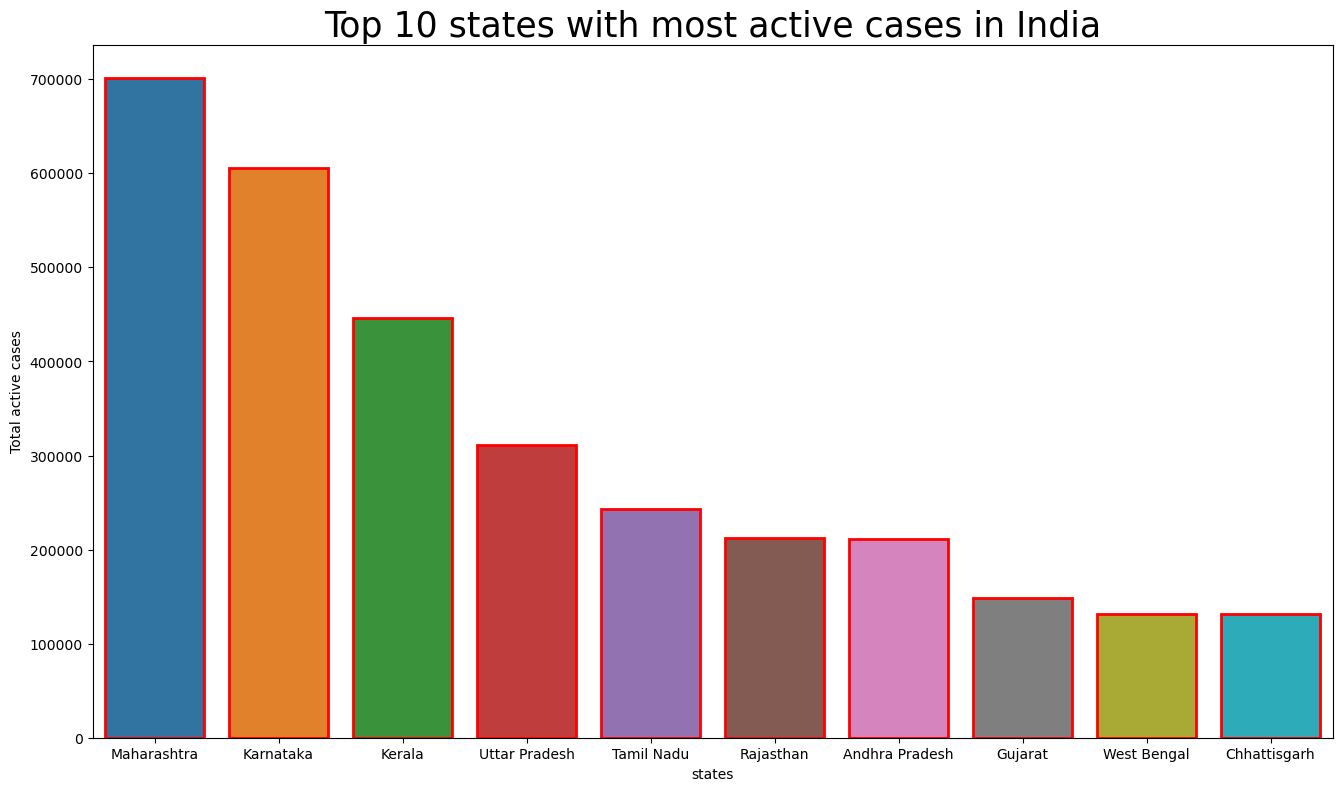

In [14]:
#  Top 10 active cases states

top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by = ['Active_cases'], ascending = False).reset_index()

fig = plt.figure(figsize = (16, 9))

plt.title("Top 10 states with most active cases in India", size = 25)

ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_cases", x = "State/UnionTerritory", linewidth = 2, edgecolor = 'red')

plt.xlabel("states")
plt.ylabel("Total active cases")
plt.show()

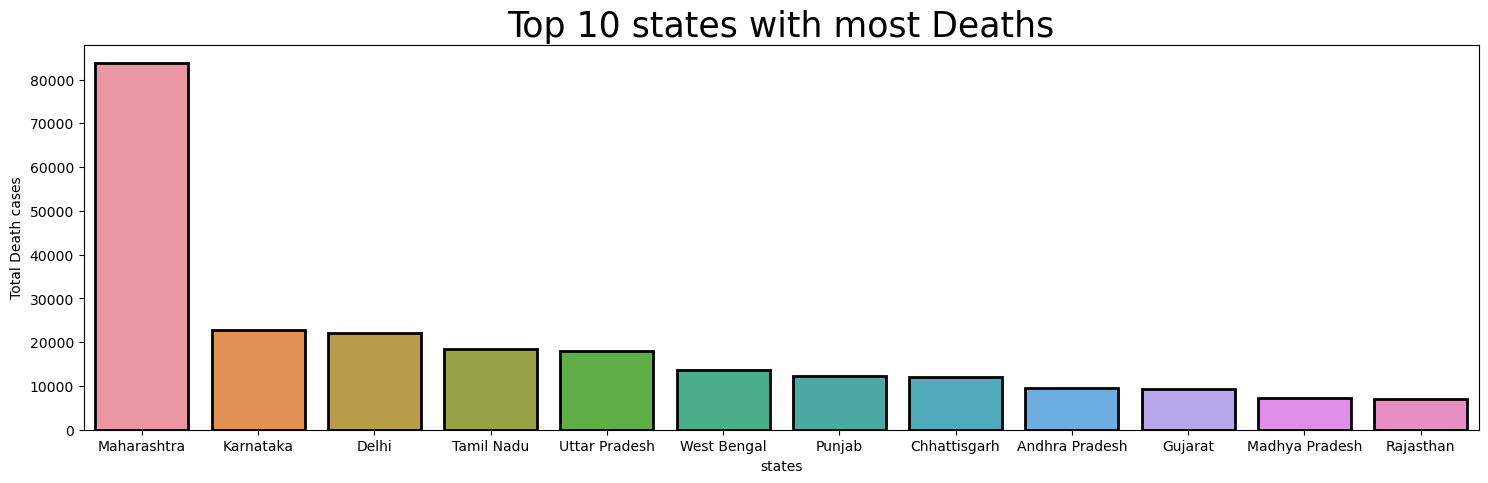

In [15]:
# Top states with Highest deaths

top_10_deaths = covid_df.groupby(by='State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by='Deaths', ascending=False).reset_index()

fig = plt.figure(figsize = (18,5))

plt.title("Top 10 states with most Deaths", size = 25)

ax = sns.barplot(data = top_10_deaths.iloc[:12], y = "Deaths", x = "State/UnionTerritory", linewidth = 2, edgecolor = "black")

plt.xlabel("states")
plt.ylabel("Total Death cases")
plt.show()

Text(0.5, 1.0, 'Top 5 Affected states in India')

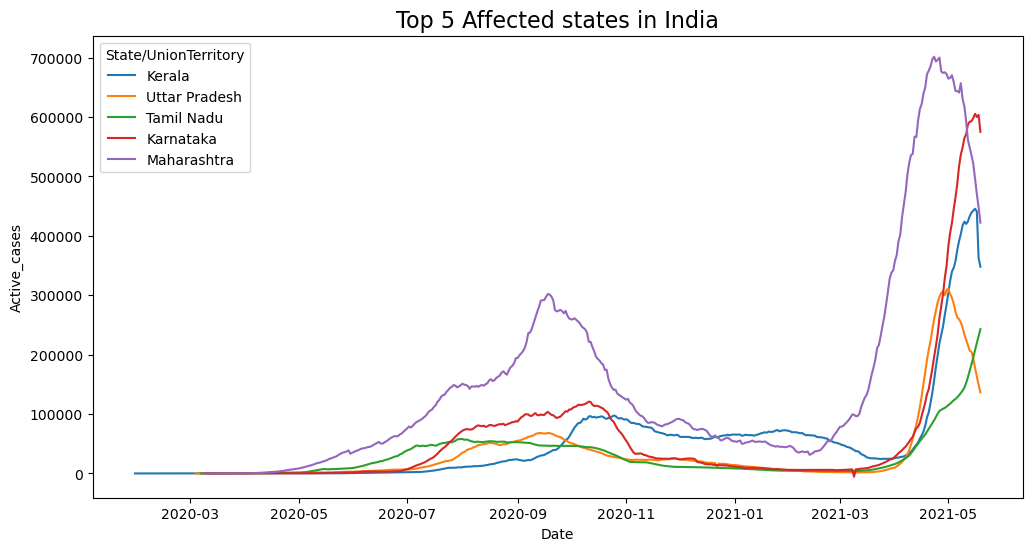

In [16]:
fig = plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])], x='Date', y='Active_cases', hue='State/UnionTerritory')

ax.set_title("Top 5 Affected states in India", size=16)